In [1]:
from jupyter_tikz import TexFragment
import os, sys
from IPython.display import display, HTML, Markdown, Math

# To find local version of the library
sys.path.append('../src')

from pmule import PredecessorTable, ProjectGraph, pinta_tikz, plot_cargas

In [2]:
%%capture
%mkdir -p ~/temp
%cd ~/temp

# Enunciado

Considere la información del proyecto cuya información aparece en la tabla adjunta:    

In [3]:
periodo_a_probabilidad = 12
periodo_b_probabilidad = 14
duracion_objetivo = 10
limite_maximo_recursos = [8]*7 + [16]
pregunta_1 = f"1. ¿Cuál es la probabilidad de terminar el proyecto entre {periodo_a_probabilidad} y {periodo_b_probabilidad} periodos?  "
pregunta_2 = f"2. Respecto a la situación original del enunciado, indique mediante el método de Ackoff-Sasieni cuales serían las actuaciones a llevar a cabo para reducir con mínimo sobrecoste la duración media del proyecto a {duracion_objetivo} periodos.  "
pregunta_3 = f"3. Respecto a la situación original del enunciado, indique cuales serían las actuaciones para poder ejecutar el proyecto con un límite en los recursos de {limite_maximo_recursos[0]} recursos por periodo durante los primeros siete periodos, y {limite_maximo_recursos[-1]} recursos por periodo posteriormente.  "
pregunta_4 = f"4. Respecto a la situación original del enunciado, calcule el valor del CPI y del SPI para el punto de control cuyos datos se proporcionan.  "

In [4]:
display(Markdown(pregunta_1))
display(Markdown(pregunta_2))
display(Markdown(pregunta_3))
display(Markdown(pregunta_4))

1. ¿Cuál es la probabilidad de terminar el proyecto entre 12 y 14 periodos?  

2. Respecto a la situación original del enunciado, indique mediante el método de Ackoff-Sasieni cuales serían las actuaciones a llevar a cabo para reducir con mínimo sobrecoste la duración media del proyecto a 10 periodos.  

3. Respecto a la situación original del enunciado, indique cuales serían las actuaciones para poder ejecutar el proyecto con un límite en los recursos de 8 recursos por periodo durante los primeros siete periodos, y 16 recursos por periodo posteriormente.  

4. Respecto a la situación original del enunciado, calcule el valor del CPI y del SPI para el punto de control cuyos datos se proporcionan.  

In [5]:
#| tbl-cap: "Cuadro de datos del enunciado del ejercicio"
#| label: tbl-datosEnunciado
import pandas as pd
import numpy as np
pd.set_option('future.no_silent_downcasting', True)

datos_enunciado = pd.DataFrame([
#  actividad, precedentes, duracion, duracion_tope, desviación, coste_planificado, coste_real, duracion_real, realizado, cur, recursos
     ('A',      'D      ',       2,         1,              0.2,         80,              80,          2,           100,   80,    4 ),
     ('B',      'A      ',       2,         1,              0.3,         70,              60,          2,            80,   10,    2 ),
     ('C',      'B      ',       3,         1,              0.4,         60,               0,          0,             0,   40,    1 ),
     ('D',      '---    ',       4,         3,              0.5,         40,              50,          5,           100,   20,    4 ),
     ('E',      'A      ',       1,         1,              0.1,         40,              30,          3,           100,   30,    3 ),
     ('F',      'D,E    ',       2,         1,              0.3,         10,              10,          3,            80,   40,    5 ),
     ('G',      '---    ',       4,         1,              0.1,         40,              50,          3,           100,   20,    4 ),
     ('H',      'I    ',       4,         2,              0.5,        100,             140,          4,            90,   50,    2 ),
     ('I',      'D      ',       2,         1,              0.1,         50,              70,          1,            50,   60,    3 ),
     ('J',      'F,H,K  ',       2,         1,              0.4,         50,               0,          0,             0,   70,    1 ),
     ('K',      'D,G    ',       4,         1,              0.2,         40,              30,          2,            60,   90,    2 ),
     ('L',      'H,K    ',       1,         1,              0.2,         30,               0,          0,             0,   10,    3 ),
] ,columns=['activity', 'predecessor', 'duration', 'cap_duration', 'standard_deviation', 'planned_value', 'actual_cost',
            'actual_duration', 'performed', 'ucr', 'resources']).set_index('activity')
tabla = datos_enunciado.copy()
tabla.columns = ["Pred.", 'Duration', 'Cap <br> duration', 'Standard <br> deviation', 'PV', 'AC',
            'Actual <br> duration', 'Performed', 'UCR', 'Resources']
display(tabla.style.set_properties(**{'text-align': 'center'}).format(precision=2))

,Pred.,Duration,Cap duration,Standard deviation,PV,AC,Actual duration,Performed,UCR,Resources
activity,,,,,,,,,,
A,D,2,1,0.20,80,80,2,100,80,4
B,A,2,1,0.30,70,60,2,80,10,2
C,B,3,1,0.40,60,0,0,0,40,1
D,---,4,3,0.50,40,50,5,100,20,4
E,A,1,1,0.10,40,30,3,100,30,3
F,"D,E",2,1,0.30,10,10,3,80,40,5
G,---,4,1,0.10,40,50,3,100,20,4
H,I,4,2,0.50,100,140,4,90,50,2
I,D,2,1,0.10,50,70,1,50,60,3


{{< pagebreak >}}

# Solución
## Apartado 1


In [6]:
display(Markdown(pregunta_1))

1. ¿Cuál es la probabilidad de terminar el proyecto entre 12 y 14 periodos?  

### Cuadro de prelaciones expandido

In [7]:
#| tbl-cap: "Cuadro de prelaciones expandido"
#| label: tbl-prelaciones
datos_proyecto=datos_enunciado.copy()
prelaciones = PredecessorTable.from_dataframe_of_strings(datos_proyecto, activity='activity', predecessor='predecessor')
prelaciones.display_immediate_linkage_matrix()

,A,B,C,D,E,F,G,H,I,J,K,L
activities,,,,,,,,,,,,
A,,,,True,,,,,,,,
B,True,,,,,,,,,,,
C,,True,,,,,,,,,,
D,,,,,,,,,,,,
E,True,,,,,,,,,,,
F,,,,,True,,,,,,,
G,,,,,,,,,,,,
H,,,,,,,,,True,,,
I,,,,True,,,,,,,,


### Grafo PERT con numeración de nodos

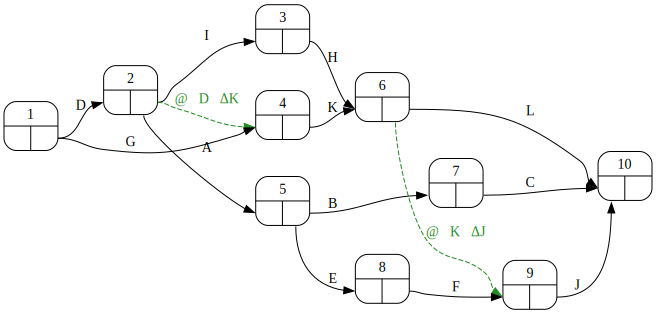

In [8]:
#| fig-cap: "Grafo Pert"
#| label: fig-PertSinTiempos
proyecto = prelaciones.create_project()
proyecto.pert()

{{< pagebreak >}}

### Matriz de Zaderenko

In [9]:
#| tbl-cap: "Matriz de Zaderenko para el cálculo de tiempos tempranos y tardíos"
#| label: tbl-Zaderenko
proyecto.zaderenko(durations=datos_proyecto['duration'])

,1,2,3,4,5,6,7,8,9,10,early
1,,4.0,,4.0,,,,,,,0.0
2,,,2.0,0.0,2.0,,,,,,4.0
3,,,,,,4.0,,,,,6.0
4,,,,,,4.0,,,,,4.0
5,,,,,,,2.0,1.0,,,6.0
6,,,,,,,,,0.0,1.0,10.0
7,,,,,,,,,,3.0,8.0
8,,,,,,,,,2.0,,7.0
9,,,,,,,,,,2.0,10.0
10,,,,,,,,,,,12.0


Los tiempos tempranos y tardíos han resultado ser

In [10]:
#| tbl-cap: "Valores de los tiempos tempranos y tardíos de los nodos"
#| label: tbl-TempranosTardios
resultados_pert = proyecto.calculate_pert(durations=datos_proyecto['duration'])
resultados_pert['nodes']

,early,late
1,0,0
2,4,4
3,6,6
4,4,6
5,6,7
6,10,10
7,8,9
8,7,8
9,10,10
10,12,12


### Holgura total de las actividades

A partir de los tiempos tempranos y tardíos, y de las duraciones de las actividades, podemos determinar la holgura total de las actividades y con ellas las rutas del camino crítico.

In [11]:
#| tbl-cap: "Valores de la holgura total de las actividades"
#| label: tbl-Holguras
resultados_pert['activities'][['H_total']]

,H_total
@∇D⤑ΔK,2
@∇K⤑ΔJ,0
A,1
B,1
C,1
D,0
E,1
F,1
G,2
H,0


### Camino crítico

El camino crítico consta de las siguientes rutas:

In [12]:
proyecto.display_critical_path(durations=datos_proyecto['duration'])

- Route_3 :	D, H, I, J <br> 

### Calendario del proyecto
Se muestra a continuación el calendario del proyecto, con indicación de las fechas de inicio y fin más tempranas y tardías de cada actividad:

In [13]:
#| tbl-cap: "Calendario del proyecto"
#| label: tbl-calendario
calendario = proyecto.calendar(datos_proyecto['duration'])
calendario

,inicio_mas_temprano,inicio_mas_tardio,fin_mas_temprano,fin_mas_tardio,H_total,duracion
activity,,,,,,
A,4,5,6,7,1,2
B,6,7,8,9,1,2
C,8,9,11,12,1,3
D,0,0,4,4,0,4
E,6,7,7,8,1,1
F,7,8,9,10,1,2
G,0,2,4,6,2,4
H,6,6,10,10,0,4
I,4,4,6,6,0,2


### Caracterización de la duración del proyecto mediante una distribución Normal

A fin de calcular la probabilidad pedida, es necesario caracterizar la distribución Normal de la duración del proyecto. Esto consiste en determinar los valores de sus parámetros: media y desviación típica de la duración del proyecto.

In [14]:
duracion_media_proyecto = int(proyecto.duration(durations=datos_proyecto['duration']))

In [15]:
Markdown(f"De los tiempos obtenidos en el método de Zaderenko, ya sabemos que la duración media del proyecto es {duracion_media_proyecto} periodos.")

De los tiempos obtenidos en el método de Zaderenko, ya sabemos que la duración media del proyecto es 12 periodos.

### Camino crítico
El camino crítico es:

In [16]:
proyecto.display_critical_path(durations=datos_proyecto['duration'])

- Route_3 :	D, H, I, J <br> 

### Grafo PERT con indicación del camino crítico

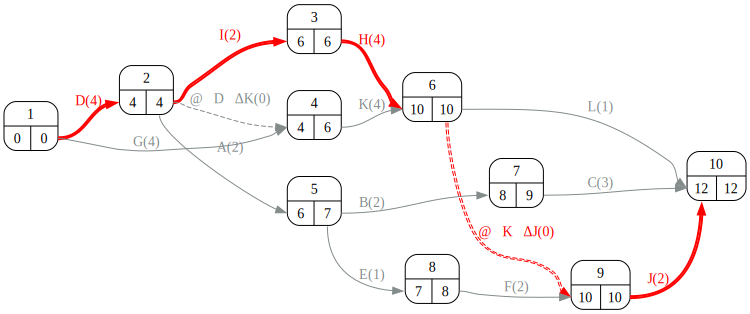

In [17]:
#| fig-cap: "Grafo Pert con tiempos, y rutas críticas"
#| label: fig-PertConTiempos
proyecto.pert(durations=datos_proyecto['duration'])

La desviación típica puede calcularse para cada ruta del camino crítico. En este caso sólo existe una ruta

In [18]:
datos_proyecto['variance'] = datos_proyecto.eval('standard_deviation ** 2')
desviacion_proyecto, varianza_caminos = proyecto.standard_deviation(durations=datos_proyecto['duration'],
                                                   variances=datos_proyecto['variance']) 
desviacion_proyecto = round(desviacion_proyecto, 2)

In [19]:
#| tbl-cap: "Varianza de las rutas del camino crítico"
#| label: tbl-varianzaRutas
varianza_caminos

,Activities,Variance
Route_3,"D, H, I, J",0.67


In [20]:
Markdown(f"Por tanto, la desviación típica del proyecto resulta ser $\\sigma$ = {desviacion_proyecto}")

Por tanto, la desviación típica del proyecto resulta ser $\sigma$ = 0.82

### Probabilidad de terminar en el intervalo especificado

In [21]:
import scipy
from scipy.stats import norm

probabilidad_de_terminar_antes_de_b = round(norm.cdf(periodo_b_probabilidad, loc=duracion_media_proyecto, scale=desviacion_proyecto)*100, 1)
probabilidad_de_terminar_antes_de_a = round(norm.cdf(periodo_a_probabilidad, loc=duracion_media_proyecto, scale=desviacion_proyecto)*100, 1)

probabilidad_de_terminar_entre_a_y_b = probabilidad_de_terminar_antes_de_b - probabilidad_de_terminar_antes_de_a
probabilidad_de_terminar_entre_a_y_b = round(probabilidad_de_terminar_entre_a_y_b, 1)

In [22]:
Markdown(f"""Una vez caracterizada la distribución normal con la que aproximamos la duración del proyecto, podemos hacer el cálculo de la probabilidad de terminar entre los periodos {periodo_a_probabilidad} y {periodo_b_probabilidad}.  
- La probabilidad de terminar antes de {periodo_a_probabilidad} periodos es  {probabilidad_de_terminar_antes_de_a} por ciento    
- La probabilidad de terminar antes de {periodo_b_probabilidad} periodos es {probabilidad_de_terminar_antes_de_b} por ciento    

Por tanto, a partir de la diferencia de estos dos valores tenemos la probabilidad de terminar dentro del mencionado intervalo: {probabilidad_de_terminar_entre_a_y_b} por ciento.
""")

Una vez caracterizada la distribución normal con la que aproximamos la duración del proyecto, podemos hacer el cálculo de la probabilidad de terminar entre los periodos 12 y 14.  
- La probabilidad de terminar antes de 12 periodos es  50.0 por ciento    
- La probabilidad de terminar antes de 14 periodos es 99.3 por ciento    

Por tanto, a partir de la diferencia de estos dos valores tenemos la probabilidad de terminar dentro del mencionado intervalo: 49.3 por ciento.


## Apartado 2

In [23]:
display(Markdown(pregunta_2))

2. Respecto a la situación original del enunciado, indique mediante el método de Ackoff-Sasieni cuales serían las actuaciones a llevar a cabo para reducir con mínimo sobrecoste la duración media del proyecto a 10 periodos.  

In [24]:
datos_proyecto = datos_enunciado.copy()
proyecto = prelaciones.create_project()

In [25]:
ackoff, best_option, duration, available = proyecto.ackoff(durations     = datos_proyecto['duration'],
                                                           min_durations = datos_proyecto['cap_duration'],
                                                           costs         = datos_proyecto['ucr'],
                                                           reduction     = duracion_media_proyecto - duracion_objetivo
                                                          )

In [26]:
#| tbl-cap: "Cuadro del algoritmo de Ackoff Sasieni"
#| label: tbl-ackoffƒ
ackoff

,A,B,C,D,E,F,G,H,I,J,K,L,0,1,2
Route_1,80.0,10.0,40.0,20.0,,,,,,,,,11.0,10.0,10.0
Route_2,80.0,,,20.0,30.0,40.0,,,,70.0,,,11.0,10.0,10.0
Route_3,,,,20.0,,,,50.0,60.0,70.0,,,12.0,11.0,10.0
Route_4,,,,20.0,,,,50.0,60.0,,,10.0,11.0,10.0,9.0
Route_5,,,,20.0,,,,,,70.0,90.0,,10.0,9.0,9.0
Route_6,,,,20.0,,,,,,,90.0,10.0,9.0,8.0,8.0
Route_7,,,,,,,20.0,,,70.0,90.0,,10.0,10.0,10.0
Route_8,,,,,,,20.0,,,,90.0,10.0,9.0,9.0,9.0
0,1.0,1.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,1.0,3.0,0.0,,,
1,1.0,1.0,2.0,0.0,0.0,1.0,3.0,2.0,1.0,1.0,3.0,0.0,,,


## Apartado 3

In [27]:
display(Markdown(pregunta_3))

3. Respecto a la situación original del enunciado, indique cuales serían las actuaciones para poder ejecutar el proyecto con un límite en los recursos de 8 recursos por periodo durante los primeros siete periodos, y 16 recursos por periodo posteriormente.  

Para responder este apartado es necesario representar la demanda de recursos a lo largo del tiempo.

In [28]:
proyecto_asignacion = proyecto.copy()
gantt, dibujo = proyecto_asignacion.gantt(datos_proyecto,
                          'duration',
                          'resources',
                          total='fila',
                          holguras=True, 
                          tikz=True)

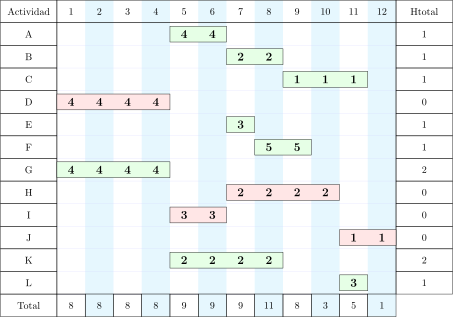

In [29]:
#| fig-cap: "Diagrama de Gantt del proyecto de acuerdo a su definición original."
#| label: fig-ganttPreAsignación
pinta_tikz(dibujo)

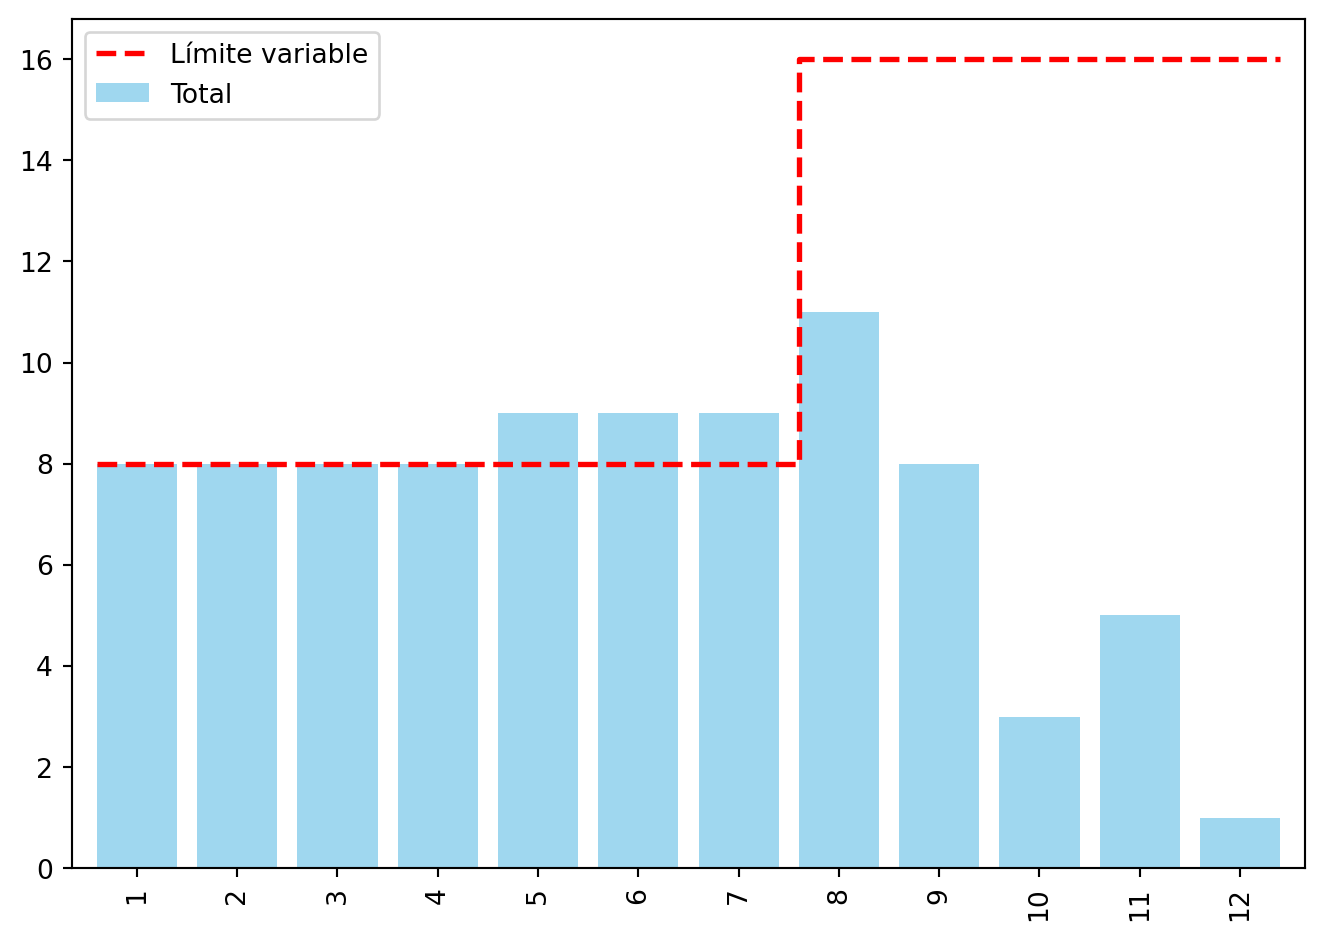

In [30]:
#| fig-cap: "Diagrama de cargas del proyecto de acuerdo a su definición original"
#| label: fig-preAsignacionBarras
plot_cargas(gantt, limite_maximo_recursos)

La demanda de recursos actual infringe el límite impuesto. Es necesario aplicar el algoritmo de asignación.

{{< pagebreak >}}

In [31]:
duration_resources = datos_proyecto[['duration','resources']].copy()
duration_resources, df, dibujo = proyecto_asignacion.asignar(data=duration_resources,
                                                            duration_label='duration',
                                                            resource_label='resources',
                                                            report=False,
                                                            maximo=limite_maximo_recursos,
                                                            )

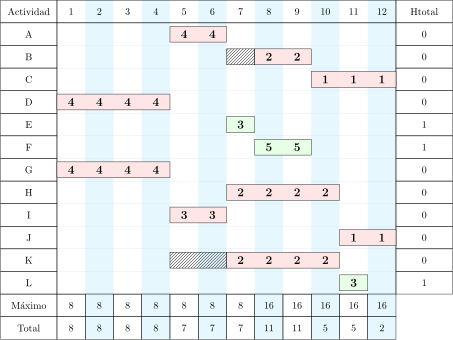

In [32]:
#| fig-cap: "Diagrama de Gantt del proyecto tras la asignación"
#| label: fig-ganttPostAsignación
pinta_tikz(dibujo)

{{< pagebreak >}}

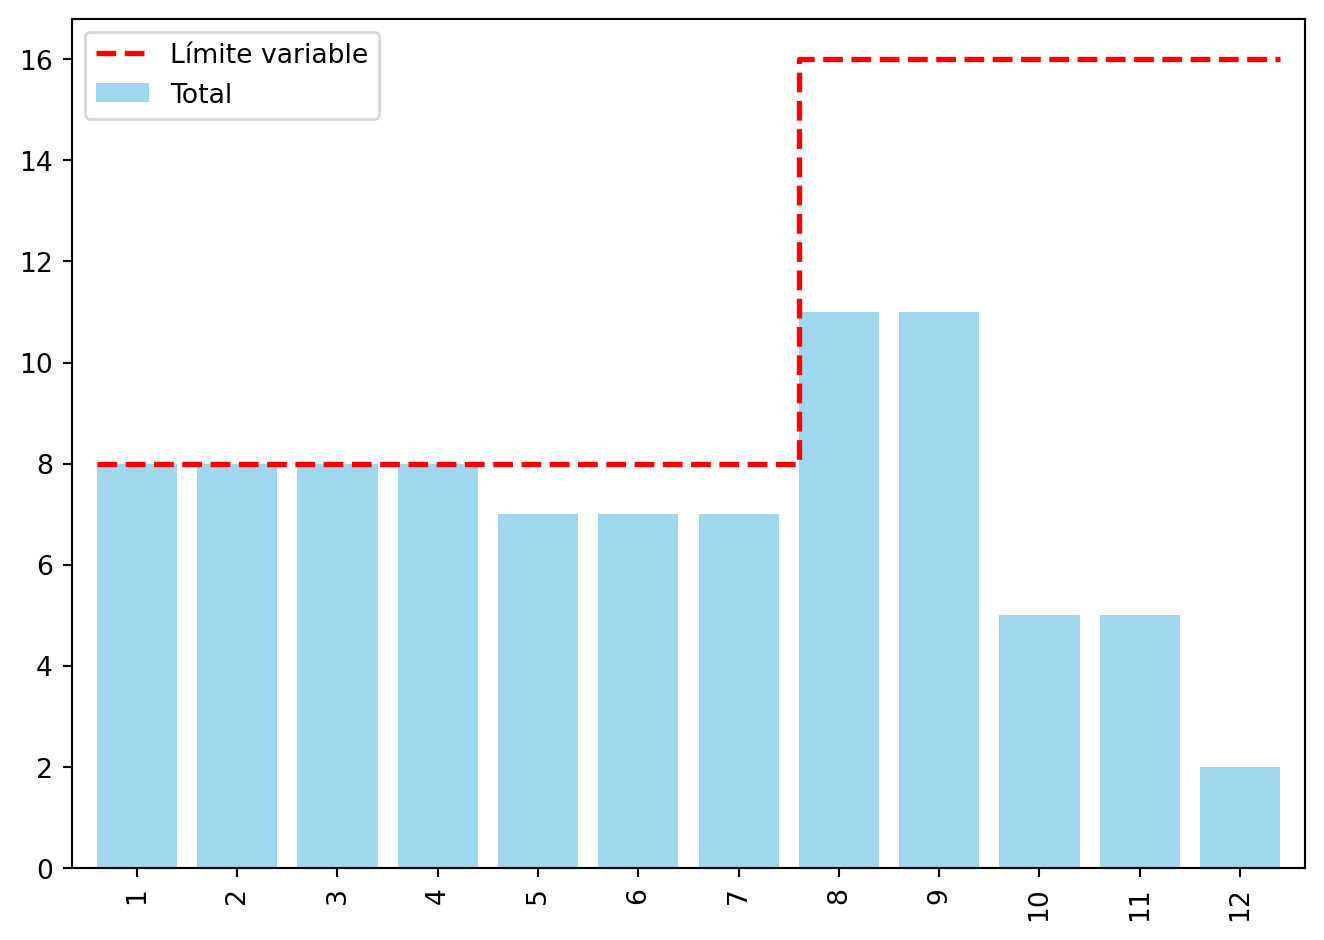

In [33]:
#| fig-cap: "Diagrama de cargas del proyecto tras aplicar el algoritmo de asignación"
#| label: fig-postAsignacionBarras
plot_cargas(df, limite_maximo_recursos)

Tras aplicar el algoritmo de asignación el proyecto ya es compatible con los límites establecidos.

## Apartado 4

In [34]:
display(Markdown(pregunta_4))

4. Respecto a la situación original del enunciado, calcule el valor del CPI y del SPI para el punto de control cuyos datos se proporcionan.  

In [35]:
PV = int(datos_proyecto['planned_value'].sum())
EV = int(datos_proyecto.eval('planned_value * performed / 100').sum())
AC = int(datos_proyecto['actual_cost'].sum())
CPI = float(EV/AC)
SPI=float(EV/PV)

In [36]:
Markdown(f"""Utilizando CPI=EV/AC y SPI=EV/PV, tenemos:  
PV={PV}  
EV={EV}  
AC={AC}  
CPI={round(CPI,2)}  
SPI={round(SPI,2)}""")

Utilizando CPI=EV/AC y SPI=EV/PV, tenemos:  
PV=610  
EV=403  
AC=520  
CPI=0.78  
SPI=0.66